# Logistic Regression

Find a classifier which maps the input(s) into two output classes.

Mathematically,\
Given, 
$$\begin{align}
X &= [x^{(0)} x^{(1)} \ldots x^{(m-1)}] \\
y &= [y^{(0)} y^{(1)} \ldots y^{(m-1)}] \;\; y^{(j)} \in \{0,1\}
\end{align}$$
and a logistic model,
$$\hat{y} = f(X) = \sigma(\theta^{T}X) \textrm{ with } 0 \leq \hat{y} \leq 1$$
Find parmeters $\theta$ such that the $\hat{y}$ is maximized given $y=1$ and $\hat{y}$ is minimized given $y=0$.

Also,
$$\hat{y} = P\left(y=1|X; \theta \right) = 1-P\left(y=0|X; \theta \right)$$

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Sigmoid Function

$$ \sigma(z) = \frac{1}{1+e^{-z}} $$

In [2]:
def sigmoid(z):
    """
    Calculates element-wise sigmoid of given input array
    
        Parameters:
            z (numpy array)    : r x c input array
        Returns
            sigma (numpy array): Element-wise sigmoid r x c array  
    """
    sigma = 1/(1+np.exp(-z))
    return sigma

Text(0.5,1,'Sigmoid Function')

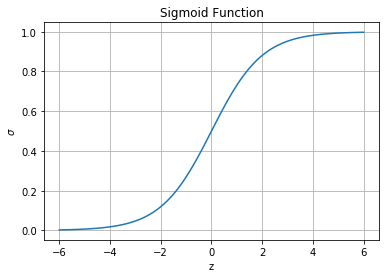

In [3]:
z = np.linspace(-6,6,100)
sigma = sigmoid(z)
plt.plot(z,sigma)
plt.grid()
plt.xlabel('z')
plt.ylabel('$\sigma$')
plt.title('Sigmoid Function')

### Logistic Regression Cost Function
$$\begin{align}
\hat{y}^{(j)} &= \sigma(z^{(j)}) \;\;\;\; j=0,1,\ldots,m-1\\
z^{(j)} &= \theta_0 + \theta_1 x^{(j)}_1 + \theta_2 x^{(j)}_2 + \ldots + \theta_n x^{(j)}_n
\end{align}$$
$$J(\theta) = \frac{1}{m}\sum_{j=1}^{m-1}\left[-y^{(j)}\log{\hat{y}^{(j)}}-\left(1-y^{(j)}\right)\log\left(1-\hat{y}^{(j)}\right)\right]$$

In [4]:
def computeCost(X, y, theta):
    '''
    Computes cost and estimated output for logistic regression.
    
        Parameters:
            X (numpy array)    : n x m input features matrix (n: number of parameters, m: number of examples)
            y (numpy array)    : 1 x m output row vector with each element 0 or 1 
            theta (numpy array): n x 1 parameter column vector
        Returns:
            J (double)         : Cost
            y_hat (double)     : Estimated output
    '''
    y_hat = sigmoid(np.dot(theta.T, X))
    J = 1/m*(-np.sum(np.log(y_hat[y==1]))-np.sum(np.log(1-y_hat[y==0])))
    return (J, y_hat)

### Gradient Descent for Logistic Regression

$$\theta_i := \theta_i - \alpha \frac{\partial J}{\partial \theta_i} \;\;\;\; i=0,1,\ldots,n$$
$$\begin{align}
\frac{\partial J}{\partial \theta_i} &= \frac{1}{m} \sum_{j=1}^{m} \left[-y^{(j)}\frac{1}{\hat{y}^{(j)}}\frac{\partial \hat{y}^{(j)}}{\partial \theta_i} + \left(1-y^{(j)}\right)\frac{1}{1-\hat{y}^{(j)}}\frac{\partial \hat{y}^{(j)}}{\partial \theta_i}\right] \\
\frac{\partial J}{\partial \theta_i} &= \frac{1}{m} \sum_{j=1}^{m} \left[\left(-\frac{y^{(j)}}{\hat{y}^{(j)}} + \frac{1-y^{(j)}}{1-\hat{y}^{(j)}}\right)\frac{\partial \hat{y}^{(j)}}{\partial \theta_i}\right]
\end{align}$$
---
$$\begin{align}
\frac{\partial \hat{y}^{(j)}}{\partial \theta_i} &= \sigma '\left(z^{(j)}\right) \frac{\partial z^{(j)}}{\partial \theta_i} \\
                                                 &= \sigma \left(z^{(j)}\right)\left(1-\sigma \left(z^{(j)}\right)\right) x_i^{(j)}\\
\frac{\partial \hat{y}^{(j)}}{\partial \theta_i} &= \hat{y}^{(j)}\left(1-\hat{y}^{(j)}\right) x_i^{(j)}\\
\end{align}$$

---
$$\begin{align}
\frac{\partial J}{\partial \theta_i} &= \frac{1}{m} \sum_{j=1}^{m} \left[-y^{(j)}\left(1-\hat{y}^{(j)}\right) + \left(1-y^{(j)}\right)\hat{y}^{(j)}\right]x_i^{(j)}\\
\frac{\partial J}{\partial \theta_i} &= \frac{1}{m} \sum_{j=1}^{m} \left( \hat{y}^{(j)}-y^{(j)} \right) x_i^{(j)}
\end{align}$$

#### Vectorization of Gradient Descent for Logistic Regression (Same as Linear Regression)
$$D\theta = \frac{1}{m} X(\hat{y}-y)^T \\
\theta := \theta - \alpha D\theta$$

In [5]:
def gradientDescent(X, y, theta, alpha, n_iterations):
    """
    Performs gradient descent for number of iterations
    
        Parameters:
            X (numpy array)    : n x m input features matrix (n: number of parameters, m: number of examples)
            y (numpy array)    : 1 x m output row vector with each element 0 or 1
            theta (numpy array): n x 1 parameter column vector
            alpha (double)     : Learning rate (Hyperparameter)
            n_iterations (int) : No. of iterations (Hyperparamter)
        Returns:
            theta (numpy array)    : Modified n x 1 parameter column vector
            J_iterations (list)    : Cost over n_iterations 
    """
    J_iterations = []
    for k in range(n_iterations):
        # Compute cost and estimated value
        J, y_hat = computeCost(X, y, theta)
        
        # Save cost every 1e4 iteration
        if k % 10_000 == 0:
            J_iterations.append(J)
            print("Iteration #{:,}".format(k), "| Cost:", J, end='\r')
        
        # Calculate gradients
        D_theta = 1/m * np.dot(X, (y_hat-y).T)
        
        # Update parameters
        theta = theta - alpha*D_theta
    print("Iteration #{:,}".format(k), "| Cost:", J)
    
    return (theta, J_iterations)

### 2D Logistic Regression

In [6]:
def plotData(X, y):
    '''
    Plots Exam 1 score v/s Exam 2 score with pass/fail represented by color. 
    
        Parameters:
            X (list or numpy array): 3 x m array with each column as [Exam1Score; Exam2Score; 1]
            y (list or numpy array): 0 - Fail or 1 - Pass
        Returns:
            None
    '''
    plt.figure()
    X1_pos, X2_pos = X[1,y.squeeze()==1], X[2,y.squeeze()==1]
    X1_neg, X2_neg = X[1,y.squeeze()==0], X[2,y.squeeze()==0]
    plt.scatter(X1_pos, X2_pos, marker='+', label='Admitted')
    plt.scatter(X1_neg, X2_neg, marker='x', label='Not Admitted')
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.legend()

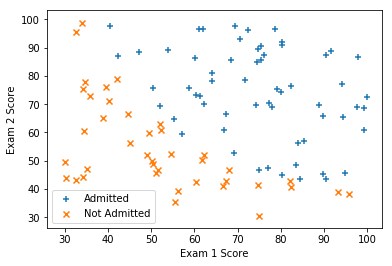

In [7]:
# Load and preprocess data
data = np.genfromtxt('data_classification_2d.csv', delimiter=',')
m, n = data.shape
X = (data[:,0:-1].T).reshape((n-1,m))
y = data[:,-1].reshape((1,m))
# Append a row of ones for bias parameter
X = np.append(np.ones((1,m)), X, axis=0)

# Plot data
plotData(X, y)

In [8]:
%%time

# Initialize parameters
theta = np.zeros((n,1))

# Set hyperparameters
alpha = 0.00125
n_iterations = 5_000_000

# Run gradient descent
theta, J_iterations = gradientDescent(X, y, theta, alpha, n_iterations)

Iteration #4,999,999 | Cost: 0.20378419774922016
Wall time: 3min 46s


Text(0.5,0,'Iteration')

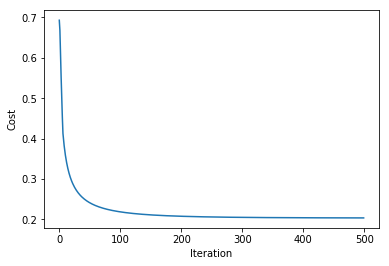

In [9]:
plt.plot(J_iterations)
plt.ylabel("Cost")
plt.xlabel("Iteration")

In [10]:
theta = theta.squeeze()
print("theta:", theta)

theta: [-23.8057683    0.19539129   0.19050134]


### Plot Decision Boundary

<Figure size 432x288 with 0 Axes>

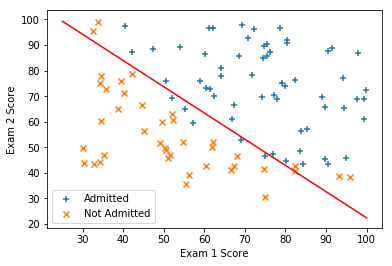

In [11]:
plt.figure()
plotData(X,y)

x1_decision = np.array([25, 100])
x2_decision = -1/theta[2]*(theta[0]+theta[1]*x1_decision)
plt.plot(x1_decision, x2_decision, 'r')

## Logistic Regression with Regularization 

Used when there is a lot of slightly useful features to prevent overfitting.

### Cost Function for Logistic Regression with Regularization
$$J(\theta) = \frac{1}{m}\sum_{j=0}^{m-1}\left[-y^{(j)}\log{\hat{y}^{(j)}}-\left(1-y^{(j)}\right)\log\left(1-\hat{y}^{(j)}\right)\right] + \frac{\lambda}{2m}\sum_{i=1}^n \theta_i^2$$

In [12]:
def computeCostReg(X, y, theta, lambd):
    '''
    Computes cost and estimated output for logistic regression with regularization.
    
        Parameters:
            X (numpy array)    : n x m input features matrix (n: number of parameters, m: number of examples)
            y (numpy array)    : 1 x m output row vector with each element 0 or 1 
            theta (numpy array): n x 1 parameter column vector
            lambd (double)     : Regularization parameter (Hyperparameter)
        Returns:
            J (double)         : Cost
            y_hat (double)     : Estimated output
    '''
    y_hat = sigmoid(np.dot(theta.T, X))
    J = 1/m*(-np.sum(np.log(y_hat[y==1]))-np.sum(np.log(1-y_hat[y==0]))) + lambd/(2*m)*np.sum(theta[1:])
    return (J, y_hat)

### Gradient Descent for Logistic Regression with Regularization
$$\frac{\partial J}{\partial \theta_i} = \frac{1}{m} \sum_{j=1}^{m} \left( \hat{y}^{(j)}-y^{(j)} \right) x_i^{(j)} + \frac{\lambda}{m}\theta_i\\ 
i=1,\ldots,n$$

In [13]:
def gradientDescentReg(X, y, theta, lambd, alpha, max_iterations=10_000, epsilon=1e-6):
    """
    Performs gradient descent for number of iterations
    
        Parameters:
            X (numpy array)     : n x m input features matrix (n: number of parameters, m: number of examples)
            y (numpy array)     : 1 x m output row vector with each element 0 or 1
            theta (numpy array) : n x 1 parameter column vector
            lambd (float)       : Regularization parameter (Hyperparameter)
            alpha (float)       : Learning rate (Hyperparameter)
            max_iterations (int): Maximum no. of iterations
            epsilon (float)     : Convergence limit
        Returns:
            theta (numpy array) : Modified n x 1 parameter column vector
            J_iterations (list) : Cost over n_iterations 
    """
    J_iterations = []
    J_prev = np.inf 
    for k in range(max_iterations):
        # Compute cost and estimated value
        J, y_hat = computeCostReg(X, y, theta, lambd)
        if J_prev-J < epsilon:
            break
        J_prev = J
        
        J_iterations.append(J)
        # Print cost every 1000 iteration
        if k % 1000 == 0:
            print("Iteration #{:,}".format(k), "| Cost:", J, end='\r')
        
        # Calculate gradients
        D_theta = 1/m * np.dot(X, (y_hat-y).T)
        D_theta[1:] = D_theta[1:] + lambd/m * theta[1:]
        
        # Update parameters
        theta = theta - alpha*D_theta
    print("Iteration #{:,}".format(k), "| Cost:", J)
    
    return (theta, J_iterations)

### Nonlinear Classification using Logistic Regression

In [14]:
def plotDataMicrochip(X, y):
    '''
    Plots Microchip Test 1 v/s Microchip Test 2 Score with pass/fail represented by color. 
    
        Parameters:
            X (numpy array): 2 x m array with each column as [Test1Score; Test2Score]
            y (numpy array): 0 - Fail or 1 - Pass
        Returns:
            None
    '''
    plt.figure(figsize=(6, 6))
    X1_pos, X2_pos = X[0,y.squeeze()==1], X[1,y.squeeze()==1]
    X1_neg, X2_neg = X[0,y.squeeze()==0], X[1,y.squeeze()==0]
    plt.scatter(X1_pos, X2_pos, marker='+', label='Pass')
    plt.scatter(X1_neg, X2_neg, marker='x', label='Fail')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()

In [15]:
def mapFeature(Xin, degree=6):
    """
    Augment input features with all polynomials with given maximum degree and m-dimensional row vector of ones.
    
        Parameters:
            Xin (numpy array) : 2 x m array of features
            degree (int)      : Maximum degree of polynomial features
        Returns:
            Xout (numpy array): [(degree+1)*(degree+2)/2] x m augmented array of features
    """
    m = Xin.shape[1]
    
    X1 = Xin[0].reshape((1,m))
    X2 = Xin[1].reshape((1,m))
    
    Xout = np.ones((1,m))
    for i in range(1,degree+1):
        for j in range(0,i+1):
            Xout = np.append(Xout, (X1**(i-j)) * (X2**j), axis=0)

    return Xout

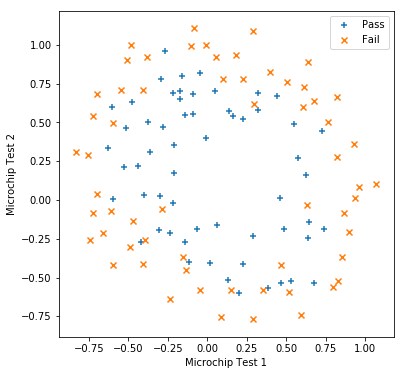

In [16]:
# Load and preprocess data
data = np.genfromtxt('data_classification_nl.csv', delimiter=',')
m, n = data.shape
X_orig = (data[:,0:-1].T).reshape((n-1,m))
y = data[:,-1].reshape((1,m))

# Plot data
plotDataMicrochip(X_orig, y)

# Augment feature array
X = mapFeature(X_orig)
n = X.shape[0]

In [17]:
%%time

# Initialize parameters
theta = np.zeros((n,1))

# Set hyperparameters
lambd = 1
alpha = 0.05

# Run gradient descent
theta, J_iterations = gradientDescentReg(X, y, theta, lambd, alpha)

Iteration #6,516 | Cost: 0.41672404432276205
Wall time: 374 ms


Text(0.5,0,'Iteration')

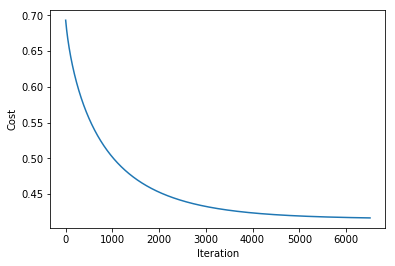

In [18]:
plt.plot(J_iterations)
plt.ylabel("Cost")
plt.xlabel("Iteration")

In [19]:
print(theta.squeeze())

[ 1.25823598  0.61727089  1.17263509 -1.99885773 -0.8974885  -1.39329135
  0.12124735 -0.36278376 -0.35813528 -0.17516377 -1.45164477 -0.05876133
 -0.60990393 -0.26864943 -1.18594394 -0.24116721 -0.20739155 -0.05139703
 -0.27369963 -0.29161702 -0.46879082 -1.04071153  0.02107246 -0.29134734
  0.01090581 -0.32445099 -0.13996826 -0.93604949]


### Plot Decision Boundary

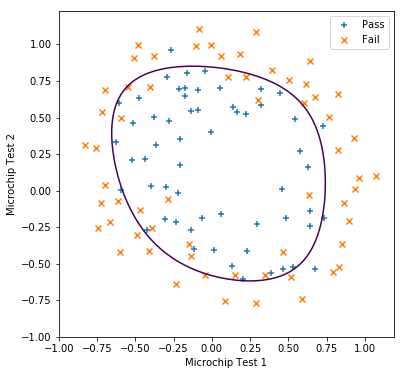

In [20]:
# Create evenly spaced points
n_points_1d = 100
x1 = np.linspace(-1, 1, n_points_1d)
x2 = np.linspace(-1, 1, n_points_1d)
x1v, x2v = np.meshgrid(x1, x2)

x1v = x1v.ravel()
x2v = x2v.ravel()

# Create feature vectors for the points
x = np.array([x1v, x2v])
x = mapFeature(x)

# Predict output value at the points
z = np.dot(theta.T,x)
z = z.reshape(n_points_1d, n_points_1d)

# Plot training examples and decision boundary
plotDataMicrochip(X_orig, y)
plt.contour(x1,x2,z,0)

### Effect of Regularization Parameter on Decision Boundary

Iteration #9,999 | Cost: 0.35669817828685657
Iteration #3,375 | Cost: 0.46518948691256157
Iteration #2,111 | Cost: 0.48664960906192756| Cost: 0.48677948233481966


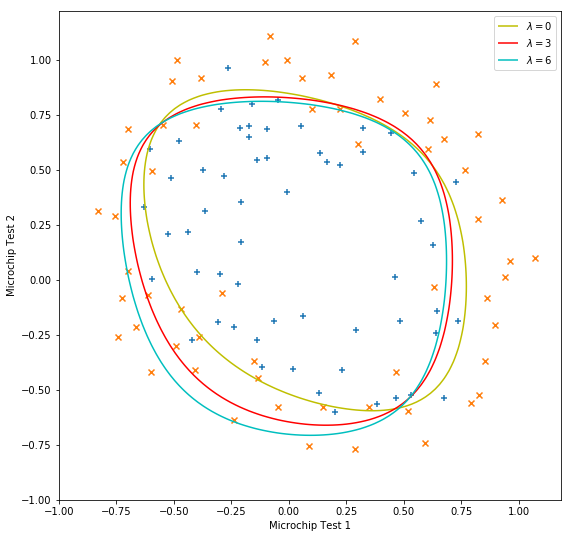

In [21]:
# Set Hyperparameters
lambds = [0, 3, 6]
alpha = 0.05

# Create evenly spaced points
n_points_1d = 100
x1 = np.linspace(-1, 1, n_points_1d)
x2 = np.linspace(-1, 1, n_points_1d)
x1v, x2v = np.meshgrid(x1, x2)

x1v = x1v.ravel()
x2v = x2v.ravel()

# Create feature vectors for the points
x = np.array([x1v, x2v])
x = mapFeature(x)

fig, ax = plt.subplots(figsize=(9, 9))

# Plot training examples
X1_pos, X2_pos = X_orig[0,y.squeeze()==1], X_orig[1,y.squeeze()==1]
X1_neg, X2_neg = X_orig[0,y.squeeze()==0], X_orig[1,y.squeeze()==0]
plt.scatter(X1_pos, X2_pos, marker='+')
plt.scatter(X1_neg, X2_neg, marker='x')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

# Plot decision boundaries
labels = []
lines = []
colors = ['y', 'r', 'c']
for lambd, color in zip(lambds, colors):
    # Run GD with for the regularization parameter
    theta = np.zeros((n,1))
    theta, _ = gradientDescentReg(X, y, theta, lambd, alpha)
    
    # Predict output value at the points
    z = np.dot(theta.T,x)
    z = z.reshape(n_points_1d, n_points_1d)
    
    # Plot decision boundary for the regularization parameter
    cs = ax.contour(x1, x2, z, 0, colors=color)
    labels.append("$\lambda = $"+str(lambd))
    lines.append(cs.collections[0])

plt.legend(lines, labels)